In [48]:
########################
# IMPORTAMOS LOS DATOS #
########################

import pandas as pd

data = pd.read_csv("../../data/ml_project1_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
###################
#   INFO GENERAL  #
###################

data.info() #Tipos de datos y si hay nulos en las columnas
print("Tamaño del dataset",data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#####################
#   VALORES NULOS   #
#####################

print("Los valores nulos de cada columnna son:")
print(data.isnull().sum())

Los valores nulos de cada columnna son:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [12]:
###########################
#    BUSCAR DATOS RAROS   #
###########################

print(data["Marital_Status"].unique()) #Hemos encontrado datos raros aqui
print(data["Education"].unique())



['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [13]:
#####################
# DT_CUSTOMER FECHA #
#####################

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

print(data["Dt_Customer"].head())


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


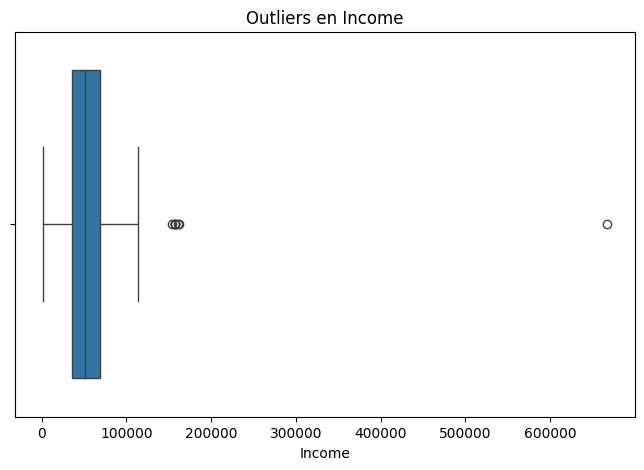

Número de outliers en 'Income': 8


In [47]:
####################
#     OUTLIERS     #
####################



#Codigo de chatgpt con comprendido por el alumno y comentado linea a linea

import seaborn as sns # Lo usamos para crear el boxplot
import matplotlib.pyplot as plt

# Para crear el grafico de income con un tamaño concreto
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Income"])
plt.title("Outliers en Income")
plt.show()

# Contar cuántos outliers hay usando IQR (Diferencia entre el cuartil 3 75% y el cuartil1 25%)
# IQR = Q3 - Q1 = 40,000 - 20,000 = 20,000

Q1 = data["Income"].quantile(0.25)  # Primer cuartil (25%)
Q3 = data["Income"].quantile(0.75)  # Tercer cuartil (75%)

IQR = Q3 - Q1  # Rango intercuartil
lower_bound = Q1 - 1.5 * IQR #Limite inferior para determinar un outlier
upper_bound = Q3 + 1.5 * IQR #Limite maximo para determinar un outlier


#Buscamos los datos que estan por debajo del limite inferior y los de por encima del limite superior y los llamamos outliers
outliers = data[(data["Income"] < lower_bound) | (data["Income"] > upper_bound)] 

print(f"Número de outliers en 'Income': {len(outliers)}") #imprimimos el numero de outliers encontrados


In [45]:
#########################
#    ELIMINAR OUTLIERS  #
#########################

data_cleaned = data[(data["Income"] >= lower_bound) & (data["Income"] <= upper_bound)]

print(f"Numero de registrs tras la eliminacion de outliers: {len(data_cleaned)}")



ruta_guardar_data_cleaned = r"C:\Users\carlo\OneDrive - ESIC\Documents\AÑO3 Q2\ifood_proyecto_1\data\data_cleaned.csv"

data_cleaned.to_csv(ruta_guardar_data_cleaned, index=False)

print(f"Archivo guardado en: {ruta_guardar_data_cleaned}")


Numero de registrs tras la eliminacion de outliers: 2208
Archivo guardado en: C:\Users\carlo\OneDrive - ESIC\Documents\AÑO3 Q2\ifood_proyecto_1\data\data_cleaned.csv


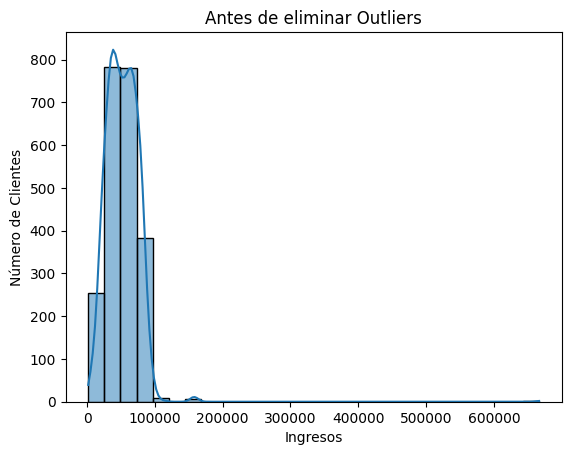

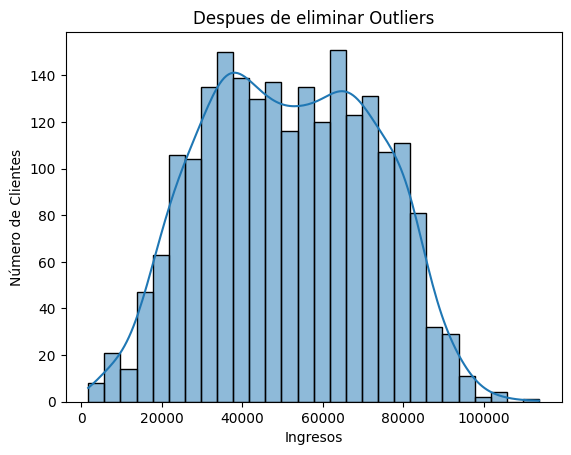

In [46]:
######################
# BUSQUEDA DE SESGOS #
######################

import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data["Income"], bins=28, kde=True)
plt.title("Antes de eliminar Outliers")
plt.xlabel("Ingresos")
plt.ylabel("Número de Clientes")
plt.show()

sns.histplot(data_cleaned["Income"], bins=28, kde=True)
plt.title("Despues de eliminar Outliers")
plt.xlabel("Ingresos")
plt.ylabel("Número de Clientes")
plt.show()
